In [2]:
pwd

'C:\\Users\\jjc12\\Desktop\\I\\Data Analyst\\Python\\Linear algebra'

In [44]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    f_path = '/Library/Fonts/Arial Unicode.ttf'
elif platform.system() == 'Windows':
    f_path = 'c:/Windows/Fonts/malgun.ttf' #Fonts dir에 인식되지 않는 경우가 문제 발생 원인, 다시 시작해서 인식시켜 보자.
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

print('Hangul font is set!')

Hangul font is set!


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Static Analysis & EDA

In [91]:
train = pd.read_csv('./data/energy/train.csv', encoding='cp949')
test = pd.read_csv('./data/energy/test.csv', encoding='cp949')
submission = pd.read_csv('./data/energy/sample_submission.csv', encoding='cp949')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [18]:
# 분포 보는 법
# feature scaling -> 정확한 비교를 위해서 모든 데이터의 수치 범위(scale)을 0과 1 사이로 맞춰줍니다.

train.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


### Scaling Distribution Comparision

In [19]:
# feature scaling
# x' = (x-x_min) / (x_max - x_min) (min_max scaling) -> 모든 값이 0-1 사이에 들어온다.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train.drop(["date_time"], axis=1))
scaled_data

array([[0.        , 0.46107178, 0.25793651, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.45862432, 0.26190476, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.45701703, 0.25396825, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.2013734 , 0.64285714, ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.18598242, 0.63492063, ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.18064915, 0.63492063, ..., 0.        , 1.        ,
        1.        ]])

In [29]:
temp = pd.DataFrame(data = scaled_data, 
                    columns = L,
                    index = train.index)
temp.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,0.500000,0.131056,0.521893,0.107047,0.755183,0.006319,0.213533,0.683333,0.483333
std,0.293528,0.116070,0.135234,0.075347,0.191677,0.032203,0.370517,0.465178,0.499724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.059488,0.424603,0.054726,0.629630,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.095853,0.519841,0.094527,0.802469,0.000000,0.000000,1.000000,0.000000
75%,0.750000,0.156742,0.611111,0.144279,0.913580,0.000000,0.300000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
L = train.columns.to_list()
L.remove("date_time")

### Feature EDA

In [32]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


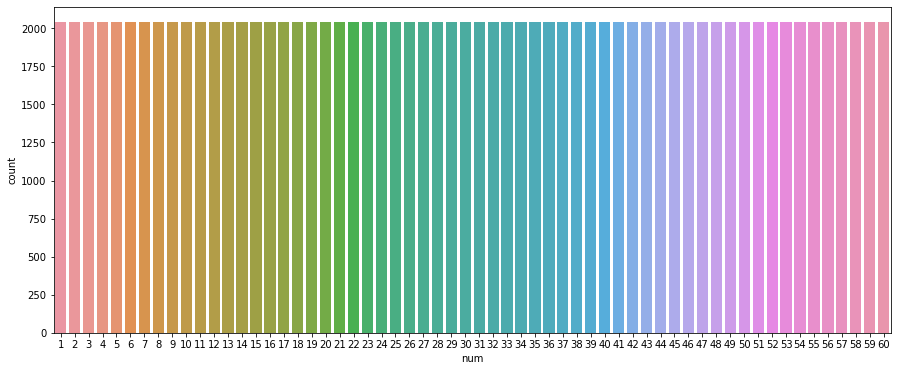

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(data=train, x="num")
plt.show()

In [35]:
# datetime type 변환, 시간 계산 용이, 실수 계산도 함께 가능

train.date_time = pd.to_datetime(train.date_time)
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


### Numeric Feature EDA
   - 전력사용량, 기온, 풍속, 습도, 강수량, 일조량

In [36]:
train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

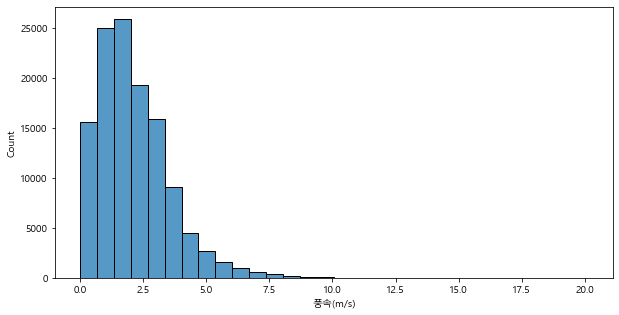

In [45]:
figure = plt.figure(figsize=(10,5))
sns.histplot(data=train, x="풍속(m/s)", bins = 30)
plt.show()

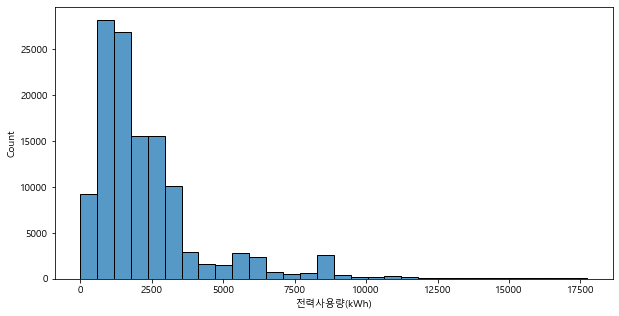

In [46]:
figure = plt.figure(figsize=(10,5))
sns.histplot(data=train, x='전력사용량(kWh)', bins = 30)
plt.show()

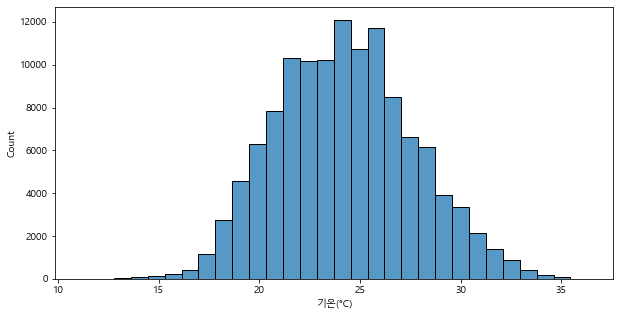

In [47]:
figure = plt.figure(figsize=(10,5))
sns.histplot(data=train, x='기온(°C)', bins = 30)
plt.show()

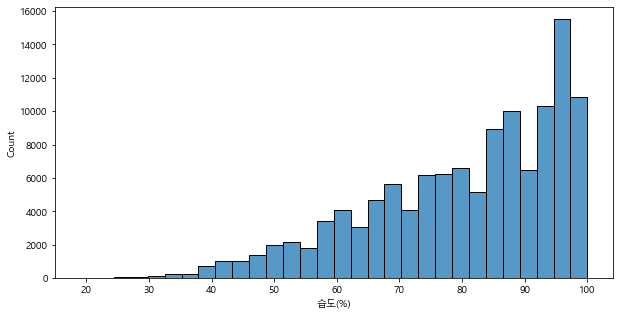

In [48]:
figure = plt.figure(figsize=(10,5))
sns.histplot(data=train, x='습도(%)', bins = 30)
plt.show()

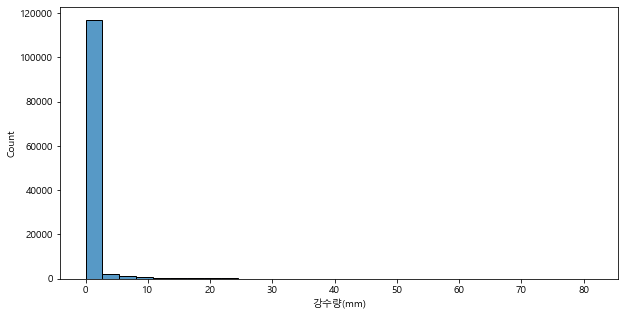

In [49]:
figure = plt.figure(figsize=(10,5))
sns.histplot(data=train, x='강수량(mm)', bins = 30)
plt.show()

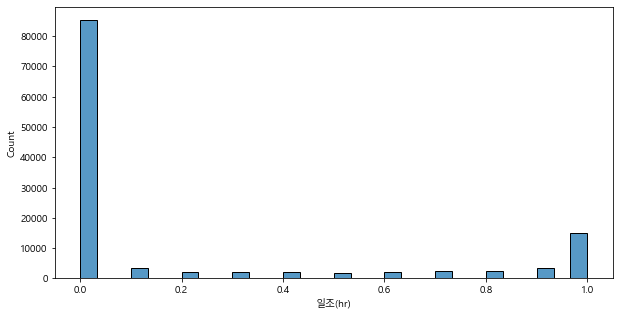

In [50]:
figure = plt.figure(figsize=(10,5))
sns.histplot(data=train, x='일조(hr)', bins = 30)
plt.show()

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


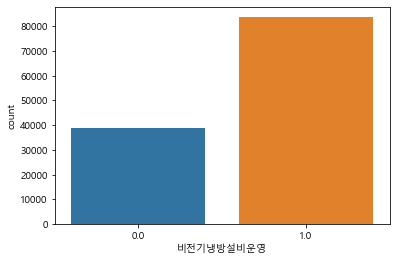

In [52]:
sns.countplot(data=train, x='비전기냉방설비운영')
plt.show()

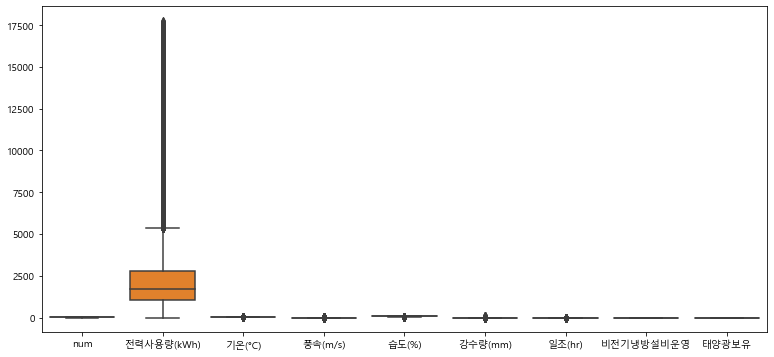

In [55]:
fig = plt.figure(figsize=(13,6))
sns.boxplot(data=train)
plt.show()

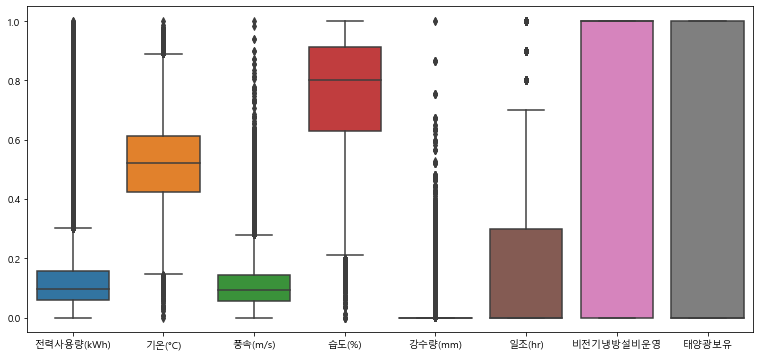

In [58]:
# scale의 차이를 위에서는 반영하지 못했으므로, 반영해서 분포 경향을 파악한다.

fig = plt.figure(figsize=(13,6))
sns.boxplot(data=temp.drop(['num'], axis =1 ))
plt.show()

### Correlation Matrix

In [66]:
corr = train.corr()
corr.head()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
num,1.000000,-0.063193,0.000363,-0.052184,0.005379,-0.004673,-0.013685,0.061031,0.099181
전력사용량(kWh),-0.063193,1.000000,0.158361,0.109965,-0.077199,-0.006028,0.112131,0.150799,0.116344
기온(°C),0.000363,0.158361,1.000000,0.167455,-0.509105,-0.093788,0.515657,0.019067,0.025865
풍속(m/s),-0.052184,0.109965,0.167455,1.000000,-0.110439,0.083433,0.156381,0.006275,-0.076560
습도(%),0.005379,-0.077199,-0.509105,-0.110439,1.000000,0.208862,-0.627597,-0.031405,-0.020657


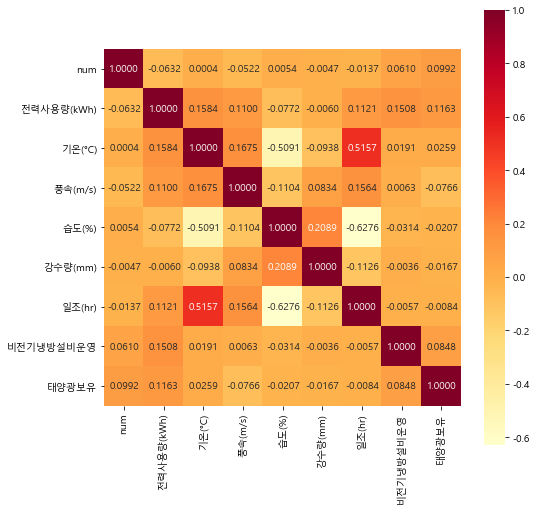

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, fmt='.4f', cmap='YlOrRd')
plt.show()

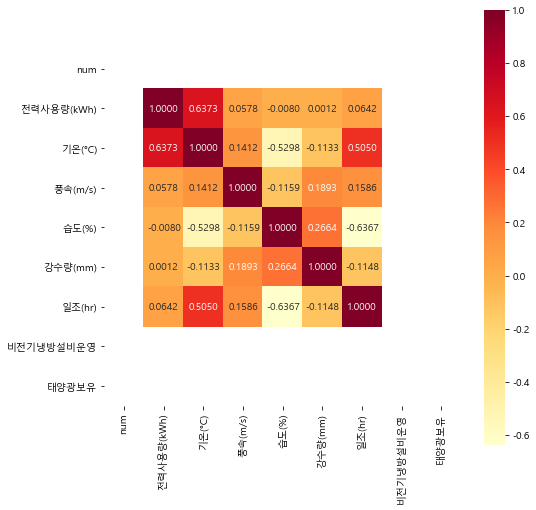

In [74]:
## 1번 건물에 대한 corr_heatmap

t_1 = train[train.num == 1]

plt.figure(figsize=(8,8))
sns.heatmap(t_1.corr(), square=True, annot=True, fmt='.4f', cmap='YlOrRd')
plt.show()

In [ ]:
# 1:1이 아닌 조합이 어떤 의미를 주는지 보기 위해서, 회귀 분석을 통해 상관계수를 확인!

## PreProcessing

### Feature Engineering

In [80]:
# train.drop(['date_time'], axis =1, inplace=True) # time_series_analysis를 안하므로.
train_ohe = pd.get_dummies(data = train, columns=["num"]) # one-hot_encoding, 범주형 변수 학습하려면
train_ohe

,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,num_1,num_2,...,num_51,num_52,num_53,num_54,num_55,num_56,num_57,num_58,num_59,num_60
0,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
122396,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
122397,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
122398,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Treat Missing Value

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 551.4+ KB


In [101]:
# drop_duplicates() : num를 일대일 매칭해서 그 값을 쭉 복사해서 채워넣어주기 위해서

building_info = train[['num', '비전기냉방설비운영', '태양광보유']].drop_duplicates()
building_info

,num,비전기냉방설비운영,태양광보유
0,1,0.0,0.0
2040,2,1.0,0.0
4080,3,1.0,1.0
6120,4,1.0,1.0
8160,5,1.0,0.0
10200,6,0.0,0.0
12240,7,1.0,0.0
14280,8,1.0,1.0
16320,9,0.0,1.0
18360,10,1.0,0.0


In [105]:
test.drop(['비전기냉방설비운영', '태양광보유'], axis=1, inplace=True)
test = pd.merge(test, building_info, on='num') # 건물 번호에 맞는 값을 매칭해서 broadcasting해서 채워줘라!
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,0.0,0.0
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,1.0,1.0
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,1.0,1.0
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [107]:
# interpolation 자동으로 선형적 관계를 고려하여 사이사이를 빈틈으로 채워준다.
test = test.interpolate(method='linear')
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0
4,1,2020-08-25 04,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0
10076,60,2020-08-31 20,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0
10077,60,2020-08-31 21,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0
10078,60,2020-08-31 22,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0


In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        10080 non-null  float64
 3   풍속(m/s)       10080 non-null  float64
 4   습도(%)         10080 non-null  float64
 5   강수량(mm, 6시간)  10080 non-null  float64
 6   일조(hr, 3시간)   10080 non-null  float64
 7   비전기냉방설비운영     10080 non-null  float64
 8   태양광보유         10080 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 787.5+ KB


### test data feature engineering

In [109]:
test.drop(['date_time'], axis=1, inplace=True)
test_ohe = pd.get_dummies(data=test, columns=['num'])
test_ohe

,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,num_1,num_2,num_3,...,num_51,num_52,num_53,num_54,num_55,num_56,num_57,num_58,num_59,num_60
0,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10076,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10077,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10078,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Modeling

In [110]:
from sklearn.linear_model import LinearRegression

X = train_ohe.drop(['전력사용량(kWh)'], axis =1) # independent - Matrix
y = train_ohe['전력사용량(kWh)'] # dependent - vector

In [111]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [112]:
model.intercept_ #b == 회귀 계수

-614.3858603415533

In [113]:
model.coef_ #W, a == 회귀 계수

array([ 7.54322960e+01,  5.06727889e+01,  3.99209421e+00,  5.25168639e+00,
        3.91375740e+02,  5.79924094e+02,  4.10112923e+02,  6.80437005e+03,
       -1.03066395e+03,  6.50129998e+02, -1.99088042e+03,  3.83931378e+02,
       -5.47056816e+02, -7.91689173e+02,  6.17925175e+03, -8.31737963e+02,
       -9.03414247e+02,  6.40718413e+02, -9.46059023e+02, -1.16789019e+03,
       -1.05431894e+03, -1.12137512e+02, -1.04702539e+03, -1.29903250e+03,
        6.64495601e+01, -9.23460635e+02, -2.75376232e+02, -4.86922564e+02,
       -1.12091073e+03, -2.70890250e+02,  3.93416464e+02, -7.91930851e+02,
        8.93061034e+02, -1.97786494e+03, -6.60087452e+01, -8.57480962e+02,
        2.86126163e+03,  3.64549005e+03,  6.71252987e+02,  2.51618806e+02,
       -1.82835393e+03, -9.84842505e+02, -1.08331232e+03, -6.36066476e+02,
        4.85973937e+03, -8.40387603e+02, -1.36995710e+02, -1.05607185e+03,
        9.29679666e+02, -8.88747847e+02, -2.53730052e+02, -7.60703018e+02,
       -4.77297438e+02, -

In [115]:
pred = model.predict(test_ohe) # 예측한 전력 사용량

In [116]:
submission["answer"] = pred
submission

,num_date_time,answer
0,1 2020-08-25 00,8658.426176
1,1 2020-08-25 01,8644.420547
2,1 2020-08-25 02,8630.414918
3,1 2020-08-25 03,8616.409289
4,1 2020-08-25 04,8596.268047
...,...,...
10075,60 2020-08-31 19,3848.333727
10076,60 2020-08-31 20,3733.813192
10077,60 2020-08-31 21,3619.292657
10078,60 2020-08-31 22,3619.292657
